# Transformada de Laplace
Presentado por
- Evert Acosta
- Christian Giron
- Sergio Pabon


## Introduccion
Se usara la funcion de transferencia para obtener respuestas de sisyemas lineales invariantes


Las raíces del polinomio del numerador se denominan ceros del sistema.
Las raíces del polinomio del denominador se denominan polos del sistema

En el diagrama de polos y ceros
- Los polos se representan con un equis
- Los ceros se representan con un circulo



In [47]:
import matplotlib.pyplot as plt
import numpy as np
import control as ct
import pandas as pd

plt.style.use('seaborn')

def solucion_sistema3x4(row1, row2, row3, b):
    a = np.array([row1, row2, row3])
    b = np.array(b)
    x = np.linalg.solve(a, b)

    return x[0], x[1], x[2]


def solucion_sistema4x5(row1, row2, row3, row4, b):
    a = np.array([row1, row2, row3, row4,])
    b = np.array(b)
    x = np.linalg.solve(a, b)

    return x[0], x[1], x[2], x[3]

## 2 Sistema masa resorte amortiguador con excitación ***(20 puntos)***

Considere el sistema masa resorte amortiguador de la sección 5 del trabajo
anterior, con las mismas consideraciones, valores de elementos y
<u>condiciones iniciales nulas</u>.

- Determine la función de transferencia del sistema, asumiendo que la
entrada es la fuerza $(f(t))$ y la salida es el desplazamiento $(x(t))$.

- Asumiendo que la fuerza de entrada $f(t)$ es la misma fuerza del trabajo
3, determine su transformada de Laplace $F(s)$. Use esta información
(junto con la función de transferencia) para calcular el desplazamiento
en función del tiempo $x(t)$ asumiendo <u>condiciones iniciales nulas</u>.
![parte2 1](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_1997.PNG)

In [48]:
a, b, c = solucion_sistema3x4([1,0,10],[0,1,25], [0,0,1595], [0,0,1])
print("Los coeficientes correspondientes a la descomposicion en fracciones parciales son:\nA={}, B={}, C={}".format(a, b, c))

Los coeficientes correspondientes a la descomposicion en fracciones parciales son:
A=-0.006269592476489029, B=-0.015673981191222573, C=0.0006269592476489029


![parte2 2](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_1998.PNG)
![parte2 3](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_1999.PNG)

- Implemente el sistema usando los bloques de la librería mecánica de
OpenModelica y obtenga la solución numérica para su desplazamiento
$x(t)$.
<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/diagrama_bloques_sistema_mecanico_parte2.png" width=500px></img>
</div>


- Implemente el sistema utilizando el bloque de función de transferencia
de la librería Blocks de OpenModelica y obtenga su respuesta $x(t)$.
<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/diagrama_bloques_funcion_transferecnia_parte2.png" width=500px></img>
</div>
<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/resultado_om_parte2.png" width=500px></img>
</div>


- Exporte los datos a Python y compare ambas respuestas. ¿Es la función
de transferencia una representación adecuada del sistema mecánico?

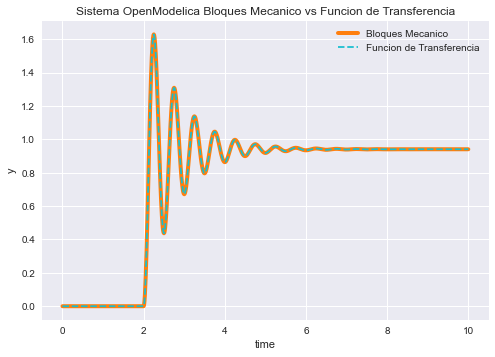

In [49]:
# Importamos los datos
df1 = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/om_parte2.csv', header=0)

def bloques_mecanicos_ftransferencia_om():
    fig, ax = plt.subplots()
    ax.plot(df1['time'],  df1['mass.s'], label='Bloques Mecanico', lw=4, color='#ff7f0e')
    ax.plot(df1['time'],  df1['transferFunction.y'],  label='Funcion de Transferencia', ls='--', color='#17becf')
    ax.set_title('Sistema OpenModelica Bloques Mecanico vs Funcion de Transferencia')
    ax.set_xlabel('time')
    ax.set_ylabel('y')
    ax.legend()

bloques_mecanicos_ftransferencia_om()

Efectivamente la funcion de transferencia es una buena representacion
del sistema, entrego resultados

## 3 Función de transferencia y respuesta al escalón (30 puntos)

Considere un sistema lineal invariante cuya respuesta a la excitación <u>escalón
unitario</u> (asumiendo condiciones iniciales nulas) está dada por la siguiente
señal: (ver Tabla 1, columna "Respuesta al escalón").

|Grupo|Respuesta al escalón|Excitación|
|:---:|:-----:|:-----:|
|$10$|$\left[-2+2e^{-2t}\cos(t)\right]u(t)$|$4\sin(t)u(t)$|

- Determine (manualmente) la función de transferencia del sistema y su
diagrama de polos y ceros.
![Funcion de Transferencia Manual](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_2018.PNG "Funcion de Transferencia Manual Parte 1")
![Funcion de Transferencia Manual Parte 2](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_2019.PNG "Funcion de Transferencia Manual Parte 2")

- Determine (manualmente) la respuesta del sistema a la excitación
impulso unitario en el dominio de t (asumiendo condiciones iniciales
nulas).
![Respuesta en t frente a impulso unitario](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_2007.PNG "Respuesta en t frente a impulso unitario")

- Utilice el paquete de control de Python para implementar la función
de transferencia. Use la función de trazado del mapa de polos y ceros
y compare la gráfica obtenida con el diagrama realizado manualmente.

Funcion de transferencia


TransferFunction(array([ -4, -10]), array([1, 4, 5]))

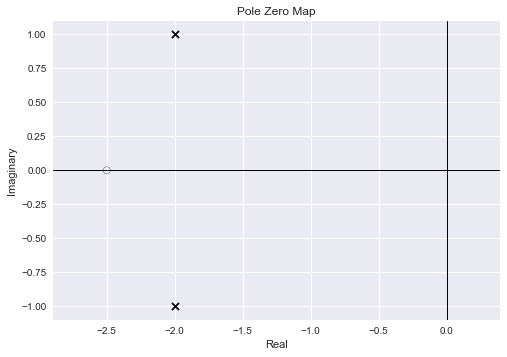

In [50]:
# Función de transferencia H que sera utilizada a lo largo del desarrollo del trabajo
H = ct.tf([-4,-10], [1,4,5])
print('Funcion de transferencia')
ct.pzmap(H)
H


- Utilice el paquete de control de Python para obtener la respuesta al
escalón de la función de transferencia implementada en el ítem anterior.
Grafique en los mismos ejes la respuesta al escalón dada en el enunciado
y la respuesta al escalón obtenida en el paquete de control. ¿Coinciden
éstas respuestas?


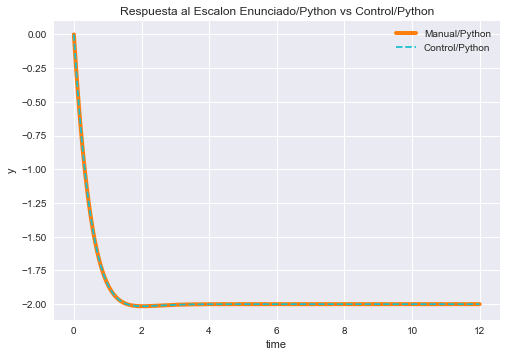

In [51]:
def enunciado_vs_control_respuesta_escalon():
    # creamos el eje del tiempo
    t = np.linspace(0, 12, 1200)

    # Respuesta al escalon en el enunciado
    respuesta_escalon_enunciado = -2+(2*np.exp(-2*t)*np.cos(t))

    no_usar, respuesta_escalon_control = ct.step_response(H, t)

    fig, ax = plt.subplots()
    ax.plot(t,  respuesta_escalon_enunciado, label='Manual/Python', lw=4, color='#ff7f0e')
    ax.plot(t, respuesta_escalon_control,  label='Control/Python', ls='--', color='#17becf')
    ax.set_title('Respuesta al Escalon Enunciado/Python vs Control/Python')
    ax.set_xlabel('time')
    ax.set_ylabel('y')
    ax.legend()



enunciado_vs_control_respuesta_escalon()

- Utilice el paquete de control de Python para obtener la respuesta al
impulso de la función de transferencia implementada. Grafique en los
mismos ejes la respuesta al impulso calculada previamente y la respuesta
al impulso obtenida en el paquete de control.

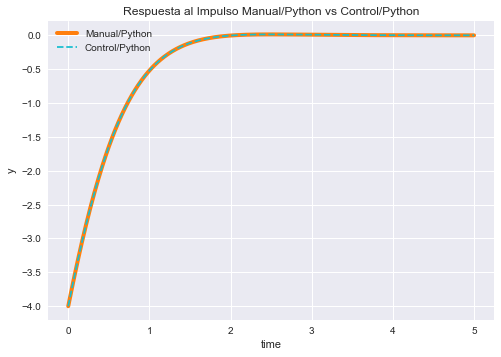

In [52]:
def manual_vs_control_respuesta_impulso():
    # Este eje de tiempo sera usado por las dos señales para la comparación
    t = np.linspace(0, 5, 500)

    # Respuesta al impulso encontrada manualmente
    respuesta_impulso_manual = 2*np.exp(-2*t)*((-2*np.cos(t))-np.sin(t))

    # Respuesta al impulso generada por Control
    no_usar, respuesta_impulso_control = ct.impulse_response(H, t)

    # graficamos
    fig, ax = plt.subplots()
    ax.plot(t,  respuesta_impulso_manual, label='Manual/Python', lw=4, color='#ff7f0e')
    ax.plot(t, respuesta_impulso_control,  label='Control/Python', ls='--', color='#17becf')
    ax.set_title('Respuesta al Impulso Manual/Python vs Control/Python')
    ax.set_xlabel('time')
    ax.set_ylabel('y')
    ax.legend()

manual_vs_control_respuesta_impulso()

- Determine manualmente la respuesta a la excitación indicada en la
tabla 1 (columna "Excitación"). Asumiendo condiciones iniciales nulas.
![Respuesta frente a la excitacion Parte 1](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_2008.PNG "Respuesta frente a la excitacion Parte 1")

In [53]:
A, B, C, D = solucion_sistema4x5([1, 0, 1, 0],
                    [0, 1, 4, 1],
                    [1, 0, 5, 4],
                    [0, 1, 0, 5],

                    [0, 0, -16, -40])

print("Los coeficientes correspondientes a la descomposicion en fracciones parciales son:\nA={}, B={}, C={}, D={}".format(A, B, C, D))

Los coeficientes correspondientes a la descomposicion en fracciones parciales son:
A=-3.0, B=-5.0, C=3.0, D=-7.0


![Respuesta frente a la excitacion Parte 2](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/IMG_1993.PNG "Respuesta frente a la excitacion Parte 2")

- Implemente la función de transferencia en OpenModelica y utilice los
bloques de la librería señales para generar la excitación del ítem anterior.
Determine si la salida obtenida en OpenModelica corresponde
a la solución obtenida en el ítem anterior graficando y superponiendo
ambas señales en Python.

[Codigo de OpenModelica](https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/trabajo4_parte3.mo)

Diagrama de bloques
<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/Captura%20de%20pantalla%202021-09-26%20193437.png" width=300px></img>
</div>
Respuesta OpenModelica
<div style="display:flex;justify-content:center">
<img src="https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/imagenes/Captura%20de%20pantalla%202021-09-26%20193518.png" width=500px></img>
</div>


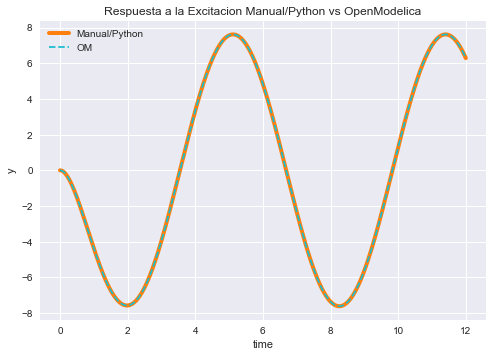

In [54]:
# Archivo csv generado desde OpenModelica
om_parte3_respuesta_excitacion = pd.read_csv('https://raw.githubusercontent.com/evertacosta/ED2021/main/Trabajo4/om_parte3_excitacion.csv', names=['t', 'y'], skiprows=1)

def manual_vs_om_respuesta_excitacion():
    # creamos el eje del tiempo
    t = np.linspace(0, 12, 1200)

    # Respuesta obtenida manualmente
    respuesta_excitacion_manual = (np.exp(-2*t) * ( (-3*np.cos(t)) + np.sin(t) )) + ((3*np.cos(t)) - (7*np.sin(t)))

    # graficamos
    fig, ax = plt.subplots()
    ax.plot(t,  respuesta_excitacion_manual, label='Manual/Python', lw=4, color='#ff7f0e')
    ax.plot(om_parte3_respuesta_excitacion.t, om_parte3_respuesta_excitacion.y,  label='OM', ls='--', color='#17becf')
    ax.set_title('Respuesta a la Excitacion Manual/Python vs OpenModelica')
    ax.set_xlabel('time')
    ax.set_ylabel('y')
    ax.legend()

manual_vs_om_respuesta_excitacion()

## Conclusiones
El paquete de control en python demostro ser suficiente para resolver los problemas propuestos

